In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from transformers import ViTFeatureExtractor,ViTModel
import torchvision
import torchvision.transforms as transforms
import torch
import glob
from PIL import Image

In [ ]:
images = []
for f in glob.iglob("/content/drive/MyDrive/receita_noticia_dataset/fotos_notícia/*"):
    images.append(np.asarray(Image.open(f)))

images = np.array(images)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
model.to(device)

ViTModel(
  (embeddings): ViTEmbeddings(
    (patch_embeddings): PatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTEncoder(
    (layer): ModuleList(
      (0): ViTLayer(
        (attention): ViTAttention(
          (attention): ViTSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
        )
        (output): ViTOutput(
          (dense): L

In [ ]:
features = None

for index,image in enumerate(images):
    if index > 50:
        break

    feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')  
    encoding = feature_extractor(images=image, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**encoding)
        out = outputs.last_hidden_state.reshape(1,-1)
    
    current_features = out.cpu().numpy()

    if features is not None:
        features = np.concatenate((features, current_features))
    else:
        features = current_features

In [ ]:
features_noticia = features

In [ ]:
images = []
for f in glob.iglob("/content/drive/MyDrive/receita_noticia_dataset/fotos_receita/*"):
    images.append(np.asarray(Image.open(f)))

images = np.array(images)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


In [ ]:
features = None

for index,image in enumerate(images):
    if index > 50:
        break

    feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')  
    encoding = feature_extractor(images=image, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**encoding)
        out = outputs.last_hidden_state.reshape(1,-1)
    
    current_features = out.cpu().numpy()

    if features is not None:
        features = np.concatenate((features, current_features))
    else:
        features = current_features

In [ ]:
features = np.concatenate((features, features_noticia), axis=0)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2).fit_transform(features)

In [ ]:
def scale_to_01_range(x):
    value_range = (np.max(x) - np.min(x))
    starts_from_zero = x - np.min(x)
    
    return starts_from_zero / value_range

In [ ]:
tx = scale_to_01_range(tsne[:, 0])
ty = scale_to_01_range(tsne[:, 1])

In [ ]:
labels = [0]*51+[1]*51

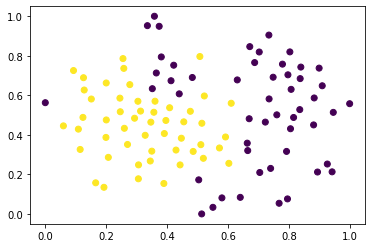

In [ ]:
plt.scatter(tx, ty, c=labels)
plt.show()